###### Scrap data from IMDB

In [156]:
import bs4
import pandas as pd
import requests

In [157]:
from bs4 import BeautifulSoup

In [158]:
url = 'http://www.imdb.com/chart/top'
header = {"Accept-Language": "en-US"}

In [159]:
page = requests.get(url, headers = header)

In [160]:
soup = BeautifulSoup(page.content, 'html.parser')


In [161]:
#another way
soup1 = BeautifulSoup(page.text, 'html.parser')


In [162]:
title = soup.find(name = 'title').get_text()
print(title)

IMDb Top 250 - IMDb


In [163]:
movies = soup.findAll('td', class_ ='titleColumn')

In [164]:
titles = [movie.find("a").text for movie in movies]
titles[0:5]

['The Shawshank Redemption',
 'The Godfather',
 'The Godfather: Part II',
 'The Dark Knight',
 '12 Angry Men']

In [165]:
len(titles)

250

In [166]:
# release years
release = [movie.find('span').text for movie in movies]
release[0:5]

['(1994)', '(1972)', '(1974)', '(2008)', '(1957)']

In [167]:
len(release)

250

In [168]:
# removing the bracket of years
m = []
for r in release:
     m.append(r.replace('(', '')) 
Release_Years =[]    
for r1 in m:
    Release_Years.append(r1.replace(')', ''))
    
Release_Years[0:5]    

['1994', '1972', '1974', '2008', '1957']

In [169]:
ratings = soup.find_all('td', class_ = 'ratingColumn imdbRating')


In [170]:
RatingsIMDB = []

for rating in ratings:
    r = rating.find('strong').get_text()
    r = float(r)
    RatingsIMDB.append(r)

In [171]:
RatingsIMDB[0:5]

[9.2, 9.1, 9.0, 9.0, 8.9]

In [172]:
Rated_Movies = pd.DataFrame({
    'Titles': titles,
    'Release_Years': Release_Years,
    'Ratings': RatingsIMDB
})

Rated_Movies.head() 

,Titles,Release_Years,Ratings
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.1
2,The Godfather: Part II,1974,9.0
3,The Dark Knight,2008,9.0
4,12 Angry Men,1957,8.9


In [173]:
Rated_Movies.shape

(250, 3)

In [174]:
Rated_Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Titles         250 non-null    object 
 1   Release_Years  250 non-null    object 
 2   Ratings        250 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.0+ KB


In [175]:
Rated_Movies.describe(include = 'all')

,Titles,Release_Years,Ratings
count,250,250,250.000000
unique,250,84,NaN
top,Dial M for Murder,1995,NaN
freq,1,8,NaN
mean,NaN,NaN,8.255200
std,NaN,NaN,0.229704
min,NaN,NaN,8.000000
25%,NaN,NaN,8.100000
50%,NaN,NaN,8.200000
75%,NaN,NaN,8.400000


In [176]:
%matplotlib inline
import matplotlib.pyplot as plt


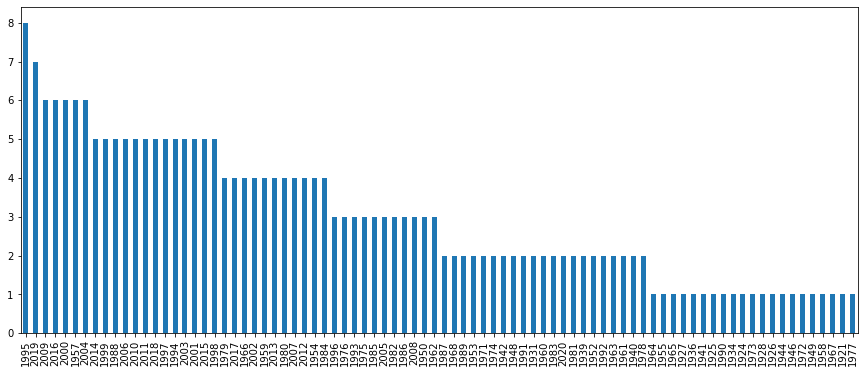

In [177]:
fig = plt.figure(figsize = (15,6))
Rated_Movies['Release_Years'].value_counts().plot.bar()
plt.show()


In [178]:

Rated_Movies['New_Release_Years']= Rated_Movies['Release_Years'].astype(int)
Rated_Movies['New_Release_Years'][:5]

0    1994
1    1972
2    1974
3    2008
4    1957
Name: New_Release_Years, dtype: int32

In [179]:
Rated_Movies['New_Release_Years'].describe()

count     250.00000
mean     1987.17200
std        24.77737
min      1921.00000
25%      1968.75000
50%      1994.50000
75%      2007.00000
max      2020.00000
Name: New_Release_Years, dtype: float64

In [180]:
group = pd.cut(Rated_Movies['New_Release_Years'], bins= [1920, 1930,1940,1950,1960,1970,1980,1990,2000,2010,2020], labels= ['1930','1940','1950','1960','1970','1980','1990','2000','2010','2020'])

In [181]:
Rated_Movies.insert(4, "Year", group )

In [182]:
Rated_Movies.head()

,Titles,Release_Years,Ratings,New_Release_Years,Year
0,The Shawshank Redemption,1994,9.2,1994,2000
1,The Godfather,1972,9.1,1972,1980
2,The Godfather: Part II,1974,9.0,1974,1980
3,The Dark Knight,2008,9.0,2008,2010
4,12 Angry Men,1957,8.9,1957,1960


<AxesSubplot:>

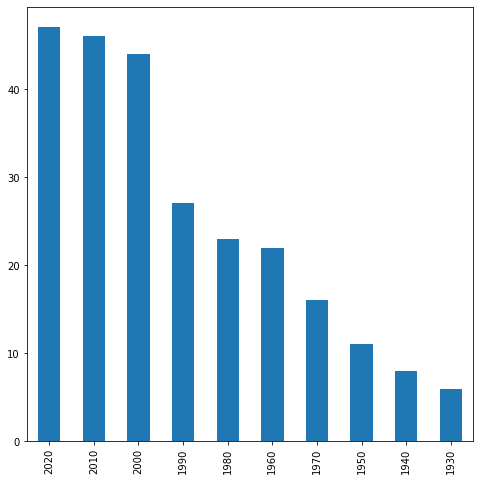

In [183]:
plt.figure(figsize= (8,8))
Rated_Movies['Year'].value_counts().plot.bar()

##### Observation:

Plot shows Number of movies are releasing per year are increasing.  

<AxesSubplot:>

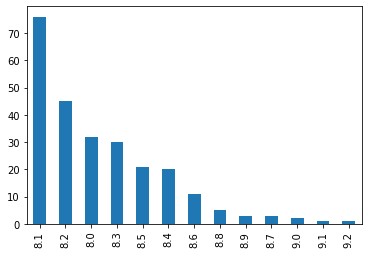

In [184]:
Rated_Movies['Ratings'].value_counts().plot(kind= "bar")

###### Observation:
Number of Ratings are decreasing as Ratings goes up

In [185]:
Top_10_Movies = Rated_Movies.sort_values(by = 'Ratings', ascending = False)

In [186]:
Top_10_Movies.head(10)

,Titles,Release_Years,Ratings,New_Release_Years,Year
0,The Shawshank Redemption,1994,9.2,1994,2000
1,The Godfather,1972,9.1,1972,1980
2,The Godfather: Part II,1974,9.0,1974,1980
3,The Dark Knight,2008,9.0,2008,2010
4,12 Angry Men,1957,8.9,1957,1960
5,Schindler's List,1993,8.9,1993,2000
6,The Lord of the Rings: The Return of the King,2003,8.9,2003,2010
9,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,2001,2010
11,Forrest Gump,1994,8.8,1994,2000
10,Fight Club,1999,8.8,1999,2000


####  Now we know which movie to watch...

### Observation:

-- Movie Ratings are not depend on Year
-- Movie Ratings are not depend on Title
